# Курсовой проект

https://www.kaggle.com/uciml/student-alcohol-consumption

**Данный датасет содержит в себе много интересной информации о студентах. Проанализировать следующее:**

1. Медиана, среднее, квартили и дисперсию возраста опрошенных студентов. Проверить при помощи QQ графика распределен ли возраст по нормальному закону.
1. Проверить наличие зависимости количества потребляемого студентом алкоголя от:
    - полная или не полная семья
    - воспитывает мать или отец
    - студент мужского или женского пола
    - есть ли связь с затрачиваемым на учебу временем
    - уменьшает ли наличие интернета дома количество потребляемого алкоголя.
1. Проверить как с возрастом изменяется количество потребляемого алкоголя.
1. Проаналиировать от каких параметров сильнее зависит употребляет ли студент алкоголь в будние дни.

# Описание данных

**Attributes for both student-mat.csv (Math course) and student-por.csv (Portuguese language course) datasets:**
- school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
- sex - student's sex (binary: 'F' - female or 'M' - male)
- age - student's age (numeric: from 15 to 22)
- address - student's home address type (binary: 'U' - urban or 'R' - rural)
- famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
- Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
- Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
- Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
- reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
- guardian - student's guardian (nominal: 'mother', 'father' or 'other')
- traveltime - home to school travel time (numeric: 1 - 1 hour)
- studytime - weekly study time (numeric: 1 - 10 hours)
- failures - number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup - extra educational support (binary: yes or no)
- famsup - family educational support (binary: yes or no)
- paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
- activities - extra-curricular activities (binary: yes or no)
- nursery - attended nursery school (binary: yes or no)
- higher - wants to take higher education (binary: yes or no)
- internet - Internet access at home (binary: yes or no)
- romantic - with a romantic relationship (binary: yes or no)
- famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
- freetime - free time after school (numeric: from 1 - very low to 5 - very high)
- goout - going out with friends (numeric: from 1 - very low to 5 - very high)
- Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
- Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
- health - current health status (numeric: from 1 - very bad to 5 - very good)
- absences - number of school absences (numeric: from 0 to 93)

**These grades are related with the course subject, Math or Portuguese:**
- G1 - first period grade (numeric: from 0 to 20)
- G2 - second period grade (numeric: from 0 to 20)
- G3 - final grade (numeric: from 0 to 20, output target)

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import statsmodels.api as sm
import pylab
import scipy.stats as stats

# Экспорт данных

In [119]:
data_por = pd.read_csv('student-por.csv')
data_mat = pd.read_csv('student-mat.csv')
data = data_por.append(data_mat, ignore_index=True)
features = data.columns
data

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,2,9,11,11
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,6,12,13,12
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,0,14,14,14
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,0,11,13,13
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039,MS,M,20,U,LE3,A,2,2,services,services,...,5,5,4,4,5,4,11,9,9,9
1040,MS,M,17,U,LE3,T,3,1,services,services,...,2,4,5,3,4,2,3,14,16,16
1041,MS,M,21,R,GT3,T,1,1,other,other,...,5,5,3,3,3,3,3,10,8,7
1042,MS,M,18,R,LE3,T,3,2,services,other,...,4,4,1,3,4,5,0,11,12,10


# Общий анализ распределения признаков

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd22c565b38>,
      dtype=object)

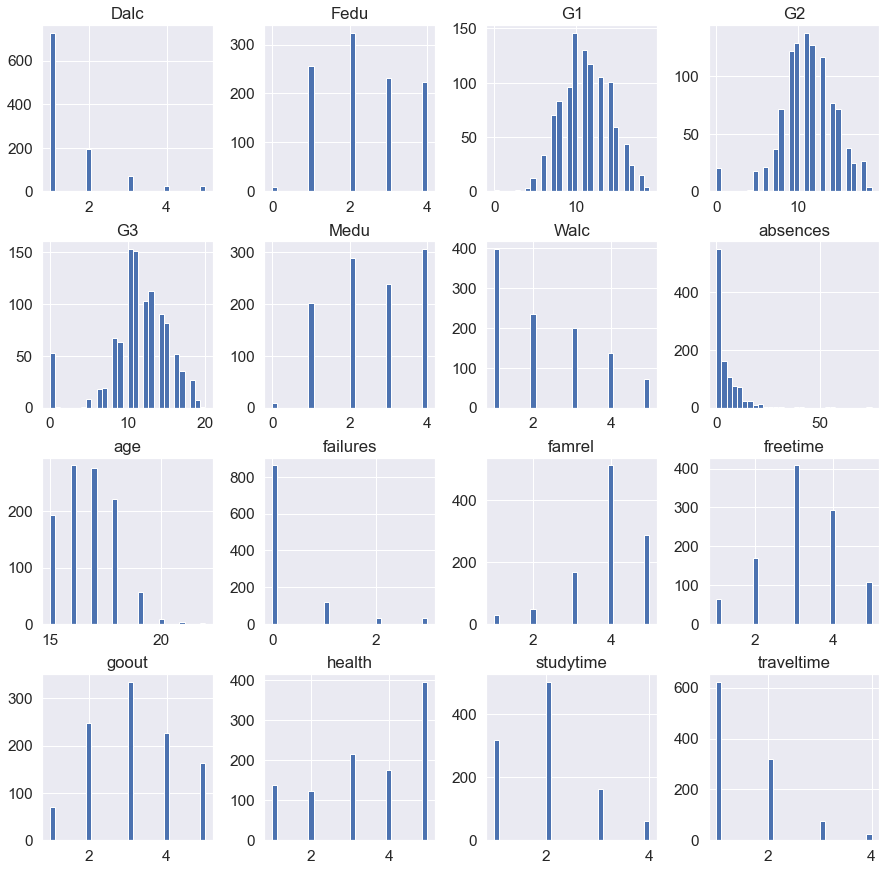

In [120]:
numeric_features = data.select_dtypes(exclude='object')
numeric_features = pd.DataFrame(numeric_features)
numeric_features.hist(figsize=(15, 15), bins = 30)

# 1. Медиана, среднее, квартили и дисперсию возраста опрошенных студентов. Проверить при помощи QQ графика распределен ли возраст по нормальному закону.

In [121]:
def show_feature_outliers(df, feature_name):
    plt.figure(figsize = (12,4))
    
    plt.subplot(1,2,1)
    plt.boxplot(df.loc[df[feature_name].notna(),feature_name])
    
    plt.subplot(1,2,2)
    sns.distplot(df.loc[df[feature_name].notna(),feature_name])

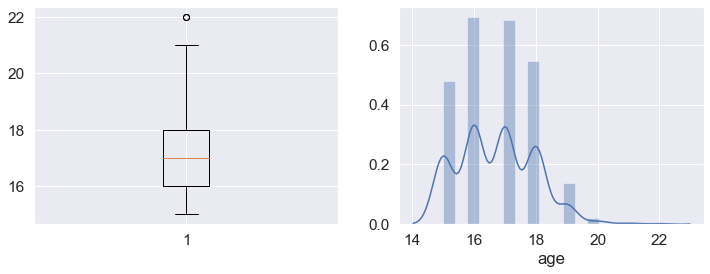

In [122]:
show_feature_outliers(data, 'age')

In [148]:
data['age'].mean(), data['age'].median(), data['age'].var(ddof=1)

(16.726053639846743, 17.0, 1.5375372396895193)

In [149]:
data['age'].value_counts()

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64

Из графиков следует, что для возраста опрощенных студентов медиана - 17 лет, 1 квартиль - 16 лет, 3 квартиль - 18 лет.
Межквартильный размах (МКР) равен 2 годам. Соответственно найдены 2 выброса с возрастом 22 года, то есть больше, чем 3 квартиль плюс 1.5 МКР, то есть больше 21 года. 
Среднее значение возраста 16.73, оценка несмещенной дисперсии 1.54.

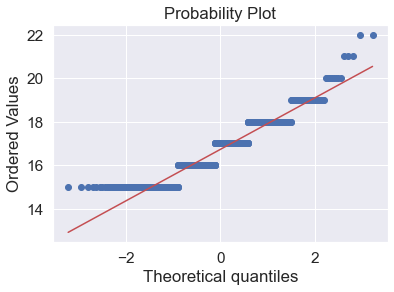

In [123]:
stats.probplot(data['age'], dist="norm", plot=pylab)
pylab.show()

По изгибу QQ-графика очевидно, что распределение возрастов имеет не нормальный, а логнормальный характер, с перекосом в сторону правого хвоста. Об этом говорит тот факт, что в левой части распределение точек поднимается выше диагонали, что говорит что в начале распределения точек как-бы недостаточно, а та же картина в правой части графика говорит о избыточности точек в конце распределения по сравнению с нормальным.

# 2. Проверить наличие зависимости количества потребляемого студентом алкоголя

# 2.1 От полноты семьи

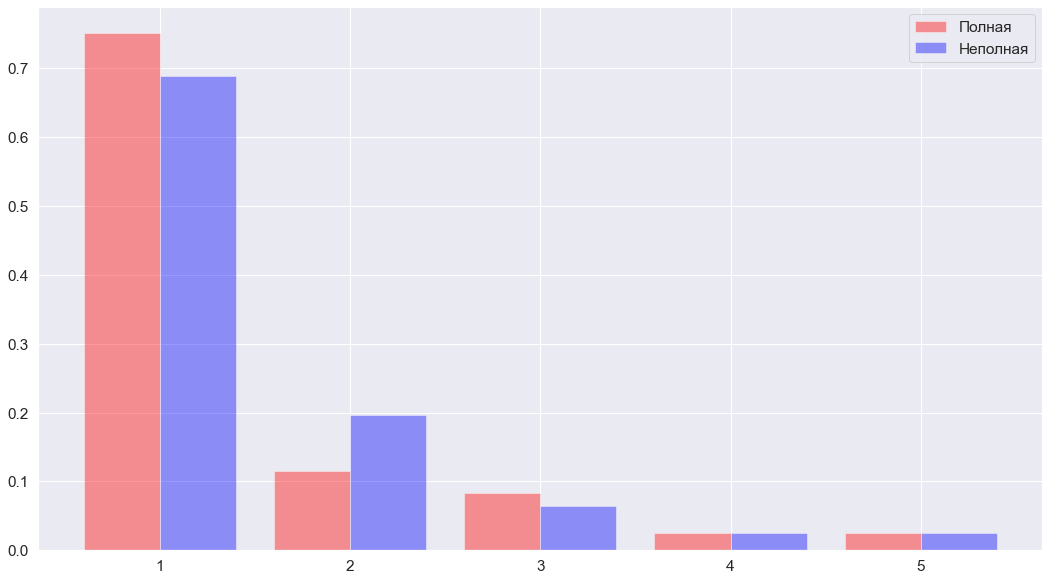

In [184]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

count_a = data.loc[(data['Pstatus'] == 'A'), 'Dalc'].count()
df_a = data.loc[(data['Pstatus'] == 'A'), 'Dalc']
x1 = df_a.value_counts().index
y1 = df_a.value_counts().values/count_a
ax.bar(x1,y1, color = 'red', alpha = 0.4, label='Полная', align = 'edge', width = -0.4)

count_t = data.loc[(data['Pstatus'] == 'T'), 'Dalc'].count()
df_t = data.loc[(data['Pstatus'] == 'T'), 'Dalc']
x2 = df_t.value_counts().index
y2 = df_t.value_counts().values/count_t
ax.bar(x2,y2, color = 'blue', alpha=0.4, label='Неполная', align = 'edge', width = 0.4)

ax.legend()

plt.show()

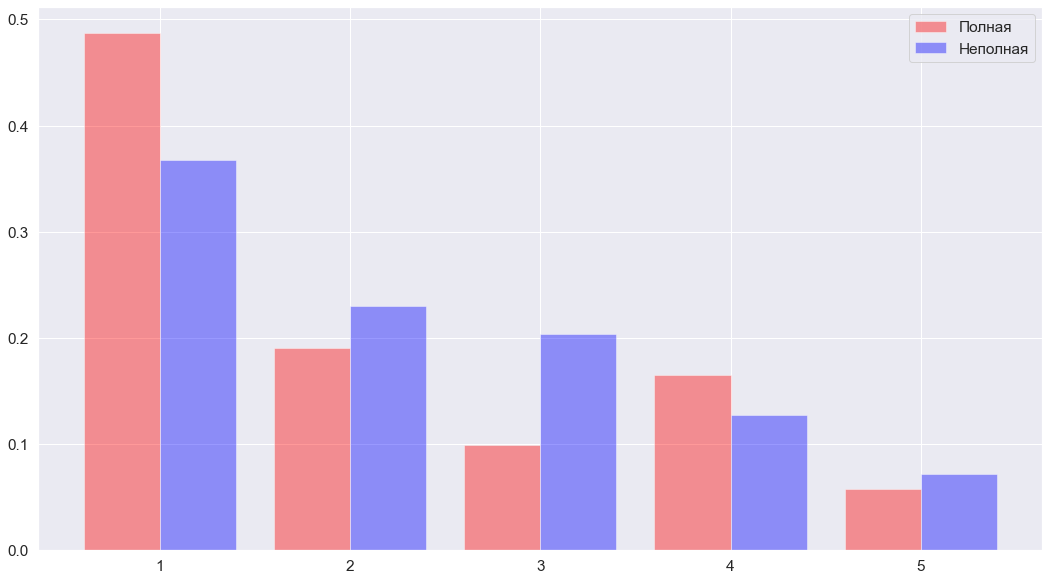

In [183]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

count_a = data.loc[(data['Pstatus'] == 'A'), 'Walc'].count()
df_a = data.loc[(data['Pstatus'] == 'A'), 'Walc']
x1 = df_a.value_counts().index
y1 = df_a.value_counts().values/count_a
ax.bar(x1,y1, color = 'red', alpha = 0.4, label='Полная', align = 'edge', width = -0.4)

count_t = data.loc[(data['Pstatus'] == 'T'), 'Walc'].count()
df_t = data.loc[(data['Pstatus'] == 'T'), 'Walc']
x2 = df_t.value_counts().index
y2 = df_t.value_counts().values/count_t
ax.bar(x2,y2, color = 'blue', alpha=0.4, label='Неполная', align = 'edge', width = 0.4)

ax.legend()

plt.show()

In [162]:
stats.f_oneway(data.loc[(data['Pstatus'] == 'A'), 'Walc'], data.loc[(data['Pstatus'] == 'T'), 'Walc'])

F_onewayResult(statistic=2.363839537852689, pvalue=0.1244798096045392)

In [164]:
stats.f_oneway(data.loc[(data['Pstatus'] == 'A'), 'Dalc'], data.loc[(data['Pstatus'] == 'T'), 'Dalc'])

F_onewayResult(statistic=0.25941882623018964, pvalue=0.6106275518554862)

Результаты дисперсионного анализа говорят о том, что гипотеза о статистической значимости в количестве употреляемого алкоголя по выходным дням в зависимости от полноты семьи может быть принята при статистическом уровне значимости больше 0.12, а для употребления в будние дни зависимость может быть признана отсутствующей.
Результаты дисперсионного анаиза подтверждаются и графиками - в будние дни разница практически незаметна, незначительное смещение для студентов из неплоных семей в сторону большего употрбленеия алкоголя. В выходные дни ситуация меняется - количество студентов из неполных семей, употребляющих алкоголь больше значения 1 составляет почти 65%, тогда как из полных семей - 50%. Очевидно резкое смещение в сторону большего употребления алкоголя для студентов из не полных семей.

# 2.2 Кто воспитывает

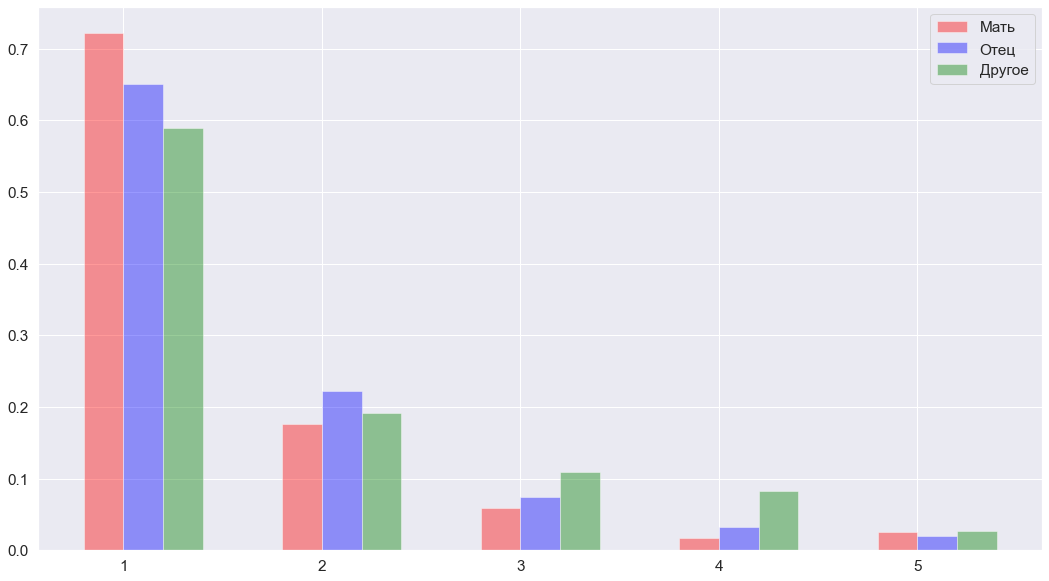

In [178]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

count_m = data.loc[(data['guardian'] == 'mother'), 'Dalc'].count()
df_m = data.loc[(data['guardian'] == 'mother'), 'Dalc']
x1 = df_m.value_counts().index
y1 = df_m.value_counts().values/count_m
ax.bar(x1-0.2, y1, color = 'red', alpha = 0.4, label = "Мать", align='edge',width=0.2)

count_f = data.loc[(data['guardian'] == 'father'), 'Dalc'].count()
df_f = data.loc[(data['guardian'] == 'father'), 'Dalc']
x2 = df_f.value_counts().index
y2 = df_f.value_counts().values/count_f
ax.bar(x2, y2, color = 'blue', alpha=0.4, label = "Отец", align='edge',width=0.2)

count_o = data.loc[(data['guardian'] == 'other'), 'Dalc'].count()
df_o = data.loc[(data['guardian'] == 'other'), 'Dalc']
x3 = df_o.value_counts().index
y3 = df_o.value_counts().values/count_o
ax.bar(x3+0.2, y3, color = 'green', alpha = 0.4, label = "Другое", align='edge',width=0.2)
ax.legend()
plt.show()

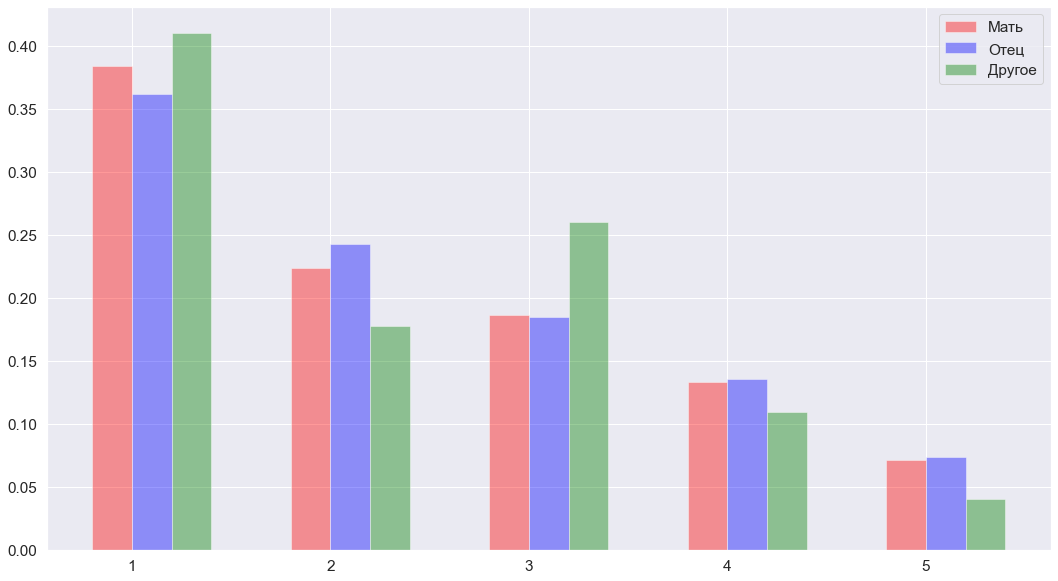

In [179]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

count_m = data.loc[(data['guardian'] == 'mother'), 'Walc'].count()
df_m = data.loc[(data['guardian'] == 'mother'), 'Walc']
x1 = df_m.value_counts().index
y1 = df_m.value_counts().values/count_m
ax.bar(x1-0.2, y1, color = 'red', alpha = 0.4, label = "Мать", align='edge',width=0.2)

count_f = data.loc[(data['guardian'] == 'father'), 'Walc'].count()
df_f = data.loc[(data['guardian'] == 'father'), 'Walc']
x2 = df_f.value_counts().index
y2 = df_f.value_counts().values/count_f
ax.bar(x2, y2, color = 'blue', alpha=0.4, label = "Отец", align='edge',width=0.2)

count_o = data.loc[(data['guardian'] == 'other'), 'Walc'].count()
df_o = data.loc[(data['guardian'] == 'other'), 'Walc']
x3 = df_o.value_counts().index
y3 = df_o.value_counts().values/count_o
ax.bar(x3+0.2, y3, color = 'green', alpha = 0.4, label = "Другое", align='edge',width=0.2)
ax.legend()
plt.show()

In [168]:
stats.f_oneway(data.loc[(data['guardian'] == 'mother'), 'Dalc'], data.loc[(data['guardian'] == 'father'), 'Dalc'], data.loc[(data['guardian'] == 'other'), 'Dalc'])

F_onewayResult(statistic=4.725974978014251, pvalue=0.009053093164085995)

In [169]:
stats.f_oneway(data.loc[(data['guardian'] == 'mother'), 'Walc'], data.loc[(data['guardian'] == 'father'), 'Walc'], data.loc[(data['guardian'] == 'other'), 'Walc'])

F_onewayResult(statistic=0.267241579220893, pvalue=0.7655406234348797)

Дисперсионный анализ показывает, что количество употребляемого алкоголя зависит от того, кто воспитывает студента, только в будние дни, в выходные дни эта зависимость незначительна.
Анализ графиков показывает, что меньше всего алкоголя в будние дни употребляют те, кого воспитывает мать, затем те, кого воспитывает отец и больше всех - кого воспитывают не родители.
В выходные дни разница не столь существена, однако больше остальных алкоголь употребляют те, кого воспитывает отец, затем те - кого воспитывает мать, и меньше них те, кого воспитывают не родители, они чаще придерживаются среднего количества алкоголя.

# 2.3 Пол студента

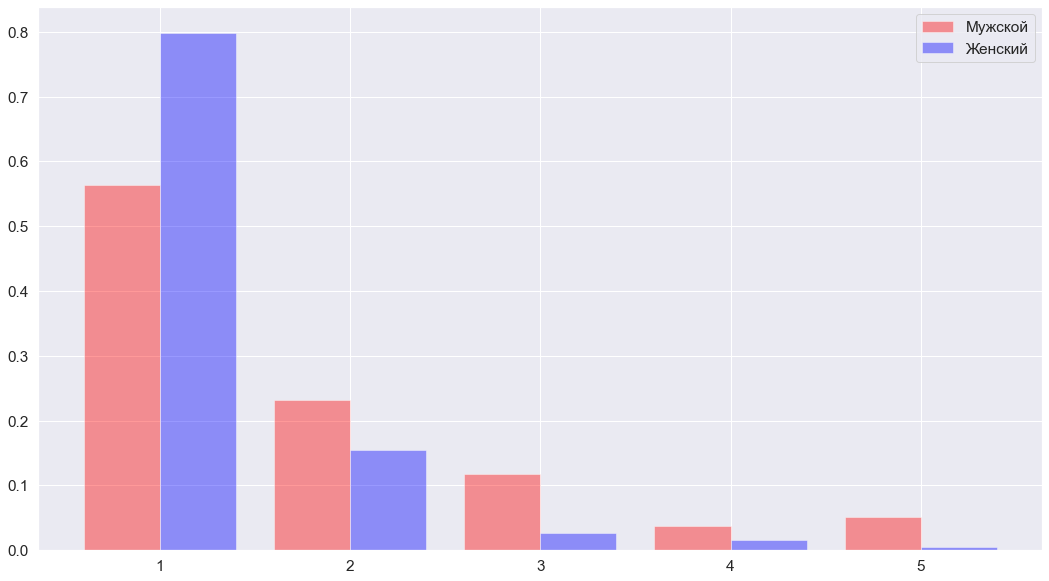

In [186]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

count_a = data.loc[(data['sex'] == 'M'), 'Dalc'].count()
df_a = data.loc[(data['sex'] == 'M'), 'Dalc']
x1 = df_a.value_counts().index
y1 = df_a.value_counts().values/count_a
ax.bar(x1,y1, color = 'red', alpha = 0.4, label='Мужской', align = 'edge', width = -0.4)

count_t = data.loc[(data['sex'] == 'F'), 'Dalc'].count()
df_t = data.loc[(data['sex'] == 'F'), 'Dalc']
x2 = df_t.value_counts().index
y2 = df_t.value_counts().values/count_t
ax.bar(x2,y2, color = 'blue', alpha=0.4, label='Женский', align = 'edge', width = 0.4)

ax.legend()

plt.show()

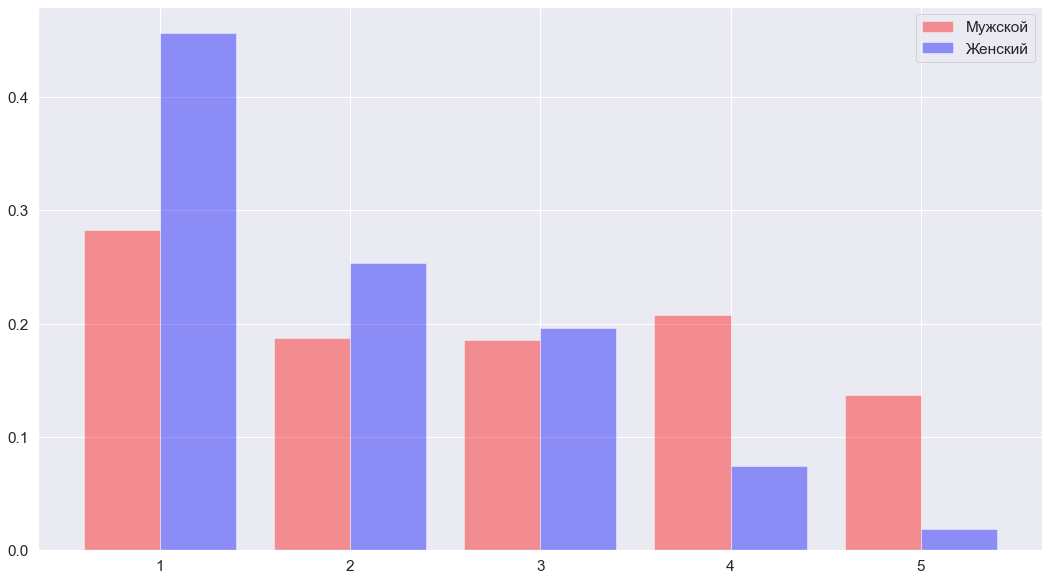

In [187]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

count_a = data.loc[(data['sex'] == 'M'), 'Walc'].count()
df_a = data.loc[(data['sex'] == 'M'), 'Walc']
x1 = df_a.value_counts().index
y1 = df_a.value_counts().values/count_a
ax.bar(x1,y1, color = 'red', alpha = 0.4, label='Мужской', align = 'edge', width = -0.4)

count_t = data.loc[(data['sex'] == 'F'), 'Walc'].count()
df_t = data.loc[(data['sex'] == 'F'), 'Walc']
x2 = df_t.value_counts().index
y2 = df_t.value_counts().values/count_t
ax.bar(x2,y2, color = 'blue', alpha=0.4, label='Женский', align = 'edge', width = 0.4)

ax.legend()

plt.show()

In [188]:
stats.f_oneway(data.loc[(data['sex'] == 'M'), 'Dalc'], data.loc[(data['sex'] == 'F'), 'Dalc'])

F_onewayResult(statistic=85.87175248042003, pvalue=1.0689688107449967e-19)

In [189]:
stats.f_oneway(data.loc[(data['sex'] == 'M'), 'Walc'], data.loc[(data['sex'] == 'F'), 'Walc'])

F_onewayResult(statistic=105.04745262007668, pvalue=1.4967429276565194e-23)

И диспресионный анализ, и результаты графического анализа подтервждают сильную зависимость употребления алкоголя от пола студента, при чем как в будние, так и в выходные дни. Видно, что в будние дни 80% девушек употребляют очень мало алкоголя. этот процент снижается до 45% в будние дни, но по прежнему 90% девушек употряблют алкоголь не больше среднего количества.
Для студентов мужского пола в будние дни только 55% употребляют очень мало алкоголя, а в выходные - чуть менее 30%. Вообще в выходные дни распределение доз алкоголя, употребляемых студентами мужского пола походе на равномерное, только слишком много алкоголя употребляют 15%, а слишком мало - 28%, остальные дозы употрбляют примерно по 20% студентов.

# 2.4 Время, затрачиваемое на учебу

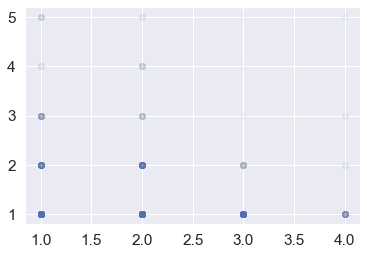

In [222]:
plt.scatter(data['studytime'], data['Dalc'], alpha = 0.01)

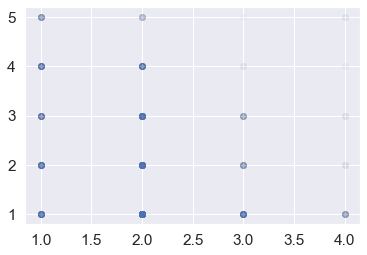

In [224]:
plt.scatter(data['studytime'], data['Walc'], alpha = 0.01)

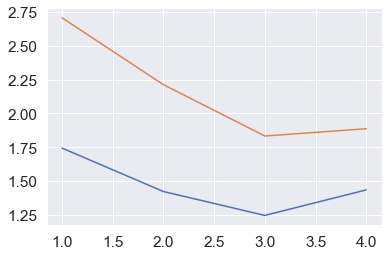

In [209]:
plt.plot(data.groupby('studytime')[['Dalc']].mean())
plt.plot(data.groupby('studytime')[['Walc']].mean())

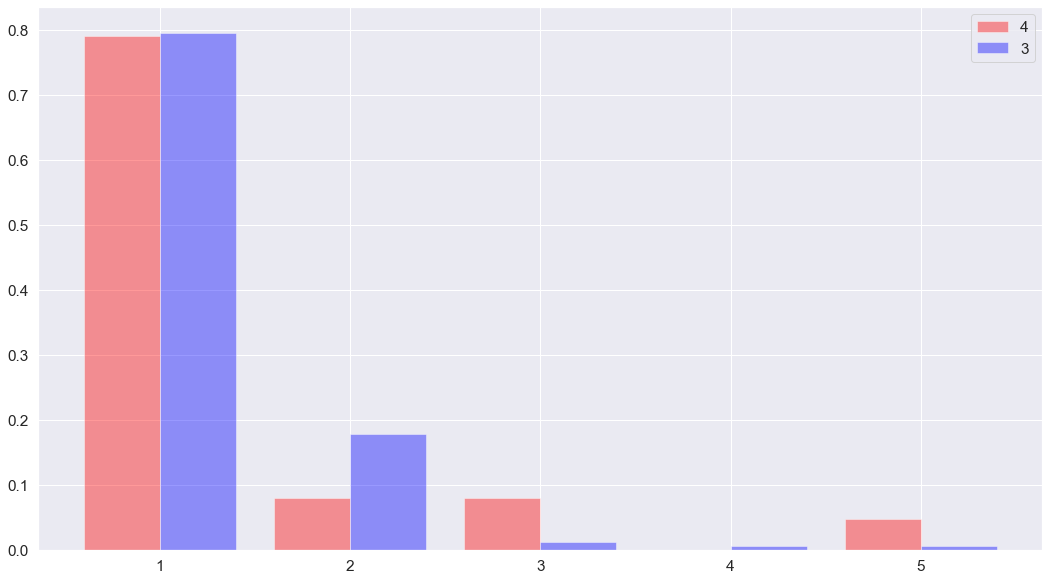

In [214]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

count_a = data.loc[data['studytime']==4, 'Dalc'].count()
df_a = data.loc[data['studytime']==4, 'Dalc']
x1 = df_a.value_counts().index
y1 = df_a.value_counts().values/count_a
ax.bar(x1,y1, color = 'red', alpha = 0.4, label='4', align = 'edge', width = -0.4)

count_t = data.loc[data['studytime']==3, 'Dalc'].count()
df_t = data.loc[data['studytime']==3, 'Dalc']
x2 = df_t.value_counts().index
y2 = df_t.value_counts().values/count_t
ax.bar(x2,y2, color = 'blue', alpha=0.4, label='3', align = 'edge', width = 0.4)

ax.legend()

plt.show()

Анализ показывает ожидаемую тенденцию - чем больше времени студент затрачивает на учебу, тем меньше алкоголя он употрябляет. Однако, для тех кто затрачивает на учебу 3 часа значение употребляемого алкоголя ниже в будни дни, чем для тех, кто затрачивает 4 часа. Это объясняется последней гистограммой - из тех, кто затрачивает на учебу 4 часа больше, значительно больше людей, чем из группы 3 часов, заяивло об употреблении очень большого количества алкоголя, из-за чего средние значения сильно смещены на повышение в области группы 4 часов. В выходные для этих двух групп значения практически выравниваются.

# 2.5 Наличие интернета

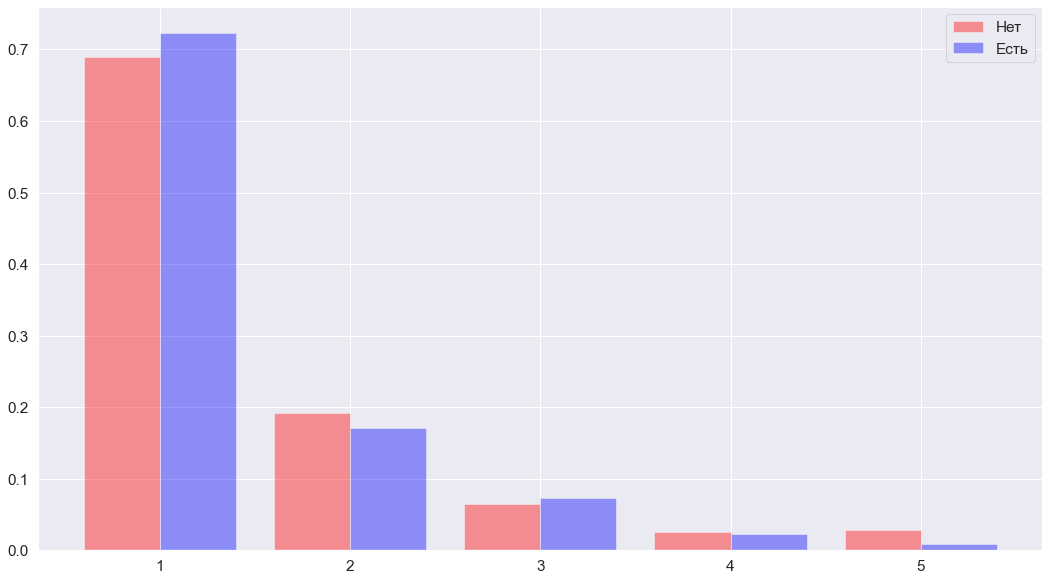

In [215]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

count_a = data.loc[(data['internet'] == 'yes'), 'Dalc'].count()
df_a = data.loc[(data['internet'] == 'yes'), 'Dalc']
x1 = df_a.value_counts().index
y1 = df_a.value_counts().values/count_a
ax.bar(x1,y1, color = 'red', alpha = 0.4, label='Нет', align = 'edge', width = -0.4)

count_t = data.loc[(data['internet'] == 'no'), 'Dalc'].count()
df_t = data.loc[(data['internet'] == 'no'), 'Dalc']
x2 = df_t.value_counts().index
y2 = df_t.value_counts().values/count_t
ax.bar(x2,y2, color = 'blue', alpha=0.4, label='Есть', align = 'edge', width = 0.4)

ax.legend()

plt.show()

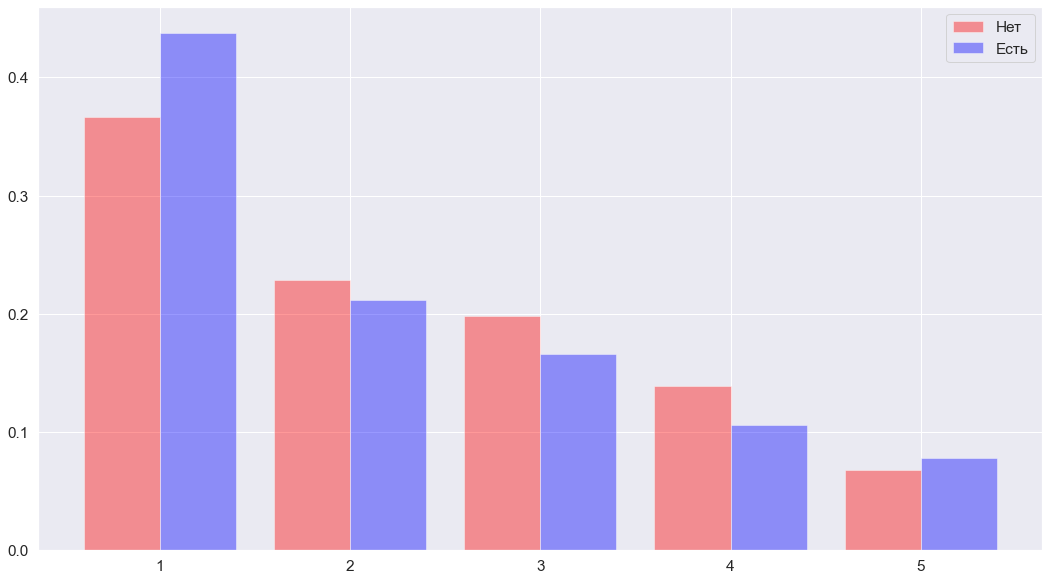

In [216]:
fig = plt.figure(figsize=(18,10))
ax = fig.add_subplot(111)

count_a = data.loc[(data['internet'] == 'yes'), 'Walc'].count()
df_a = data.loc[(data['internet'] == 'yes'), 'Walc']
x1 = df_a.value_counts().index
y1 = df_a.value_counts().values/count_a
ax.bar(x1,y1, color = 'red', alpha = 0.4, label='Нет', align = 'edge', width = -0.4)

count_t = data.loc[(data['internet'] == 'no'), 'Walc'].count()
df_t = data.loc[(data['internet'] == 'no'), 'Walc']
x2 = df_t.value_counts().index
y2 = df_t.value_counts().values/count_t
ax.bar(x2,y2, color = 'blue', alpha=0.4, label='Есть', align = 'edge', width = 0.4)

ax.legend()

plt.show()

In [217]:
stats.f_oneway(data.loc[(data['internet'] == 'yes'), 'Dalc'], data.loc[(data['internet'] == 'no'), 'Dalc'])

F_onewayResult(statistic=1.6292322826350696, pvalue=0.20209367358413813)

In [218]:
stats.f_oneway(data.loc[(data['internet'] == 'yes'), 'Walc'], data.loc[(data['internet'] == 'no'), 'Walc'])

F_onewayResult(statistic=1.9859346029853961, pvalue=0.15906495890740766)

Проведенные дисперсионный и графический анализы говорят о том, что в выходные дни зависимость между употреблением алкоголя и наличием интернета не существенна. В выходные дни в целом очевидно, что студенты, у которых есть интернет, употрябляют алкоголя меньше, чем те, у кого интернета нет. Есть незначительный выброс среди тех, у кого есть интернет, при этом они употребляют больше очень больших доз алкоголя по выходным.

# 3.Проверить как с возрастом изменяется количество потребляемого алкоголя

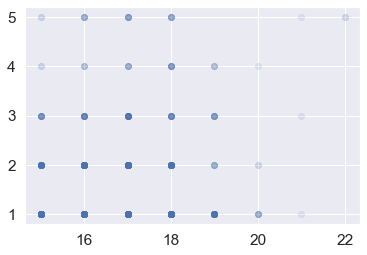

In [225]:
plt.scatter(data['age'], data['Dalc'], alpha = 0.1)

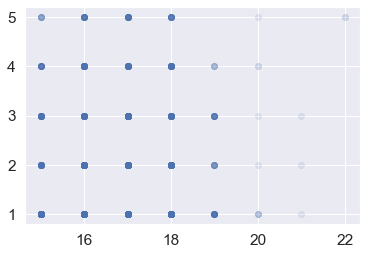

In [137]:
plt.scatter(data['age'], data['Walc'], alpha = 0.1)

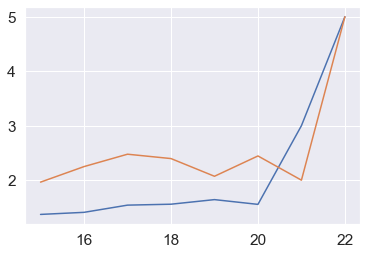

In [226]:
plt.plot(data.groupby('age')[['Dalc']].mean())
plt.plot(data.groupby('age')[['Walc']].mean())

In [229]:
data['age'].value_counts()

16    281
17    277
18    222
15    194
19     56
20      9
21      3
22      2
Name: age, dtype: int64

In [230]:
np.corrcoef(data['age'], data['Dalc']), np.corrcoef(data['age'], data['Walc'])

(array([[1.        , 0.13345299],
        [0.13345299, 1.        ]]),
 array([[1.        , 0.09829141],
        [0.09829141, 1.        ]]))

Данные, соответствующие студентам старше 19 лет нельзя признавать репрезентативными, поскольку студентов, старше 19 лет в анализируемых данных всего 14 человек.
Коэффициент корреляции показывает, что линейной связи между возрастом студентов и количеством употряблемого алкоголя ни в будние, ни в выходные дни нет.
Из графиков следует, что в среднем с возрастом количество алкоголя, употребляемого студентами в будние дни незначительно возрастает, а в выходные дни его максимум приходится примерно на 17 лет, и затем незначительно снижается. 
Кроме того из графиков очевидно, что доля алкоголя, употребляемая в выходные дни в любом возрасте значительно выше, чем в будние дни.

# 4.Проаналиировать от каких параметров сильнее зависит употребляет ли студент алкоголь в будние дни

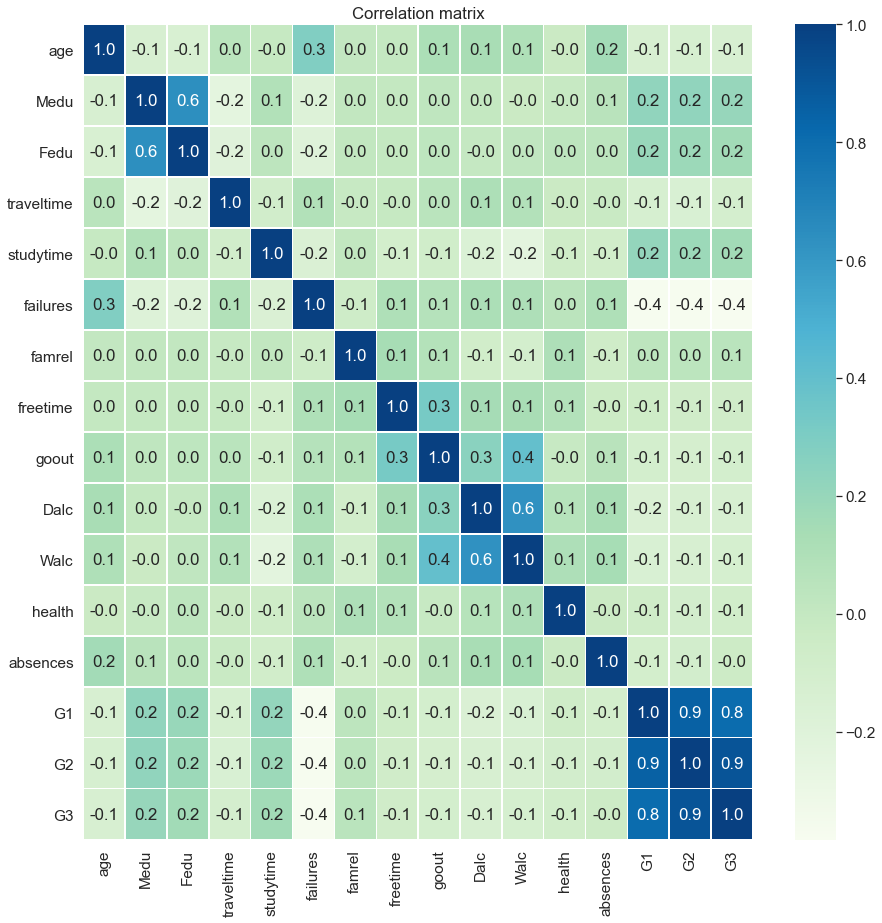

In [232]:
corr = data.corr()
plt.figure(figsize = (15, 15))
sns.set(font_scale=1.4)
sns.heatmap(data.corr(), annot=True, fmt='.1f', linewidths=.5, cmap='GnBu')
plt.title('Correlation matrix')
plt.show()

Как видно из тепловой карты, сильнее всего количество употребляемого в будние дни студентом алкоголя зависит от количества алкоголя, употребляемого в выходные дни. Н втором месте находится параметр goout, то есть частота встреч с друьями. А также наблюдается незначительная обрабная связь между количество употряблемого алкоголя в будние дни и количеством времени, затрачиваемым на учебу.